# Testing Julia's Graphics Packages

In [4]:
using Compose, Colors, Gadfly, Luxor, RDatasets

\begin{definition} \label{def:FT}
Let $x[n]$ be a sequence of length $N$. Then, its **Fourier transform** is given by
\begin{equation}
\label{eq:FT}
X[k]= \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-j2\pi \frac{kn}{N}}
\end{equation}
\end{definition}

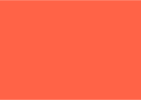

In [2]:
composition = compose(compose(context(), rectangle()), fill("tomato"))

In [3]:
iris = dataset("datasets", "iris");

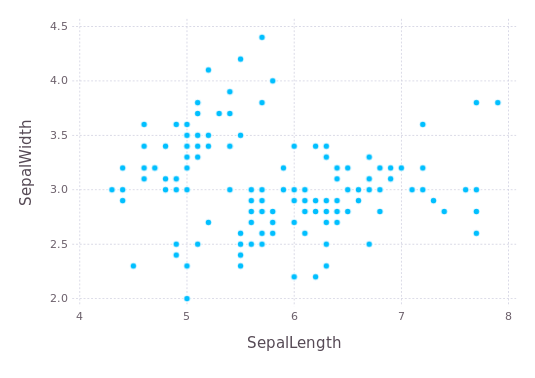

In [4]:
p = plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point)

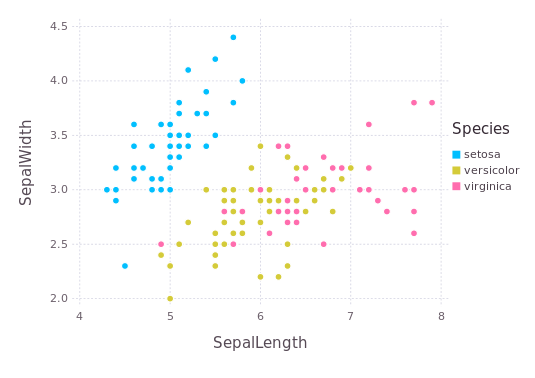

In [5]:
plot(iris, x=:SepalLength, y=:SepalWidth, color=:Species,
         Geom.point)

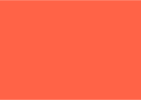

In [6]:
composition = compose(compose(context(), rectangle()), fill("tomato"))

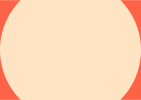

In [8]:
composition = compose(context(),
        (context(), Gadfly.circle(), fill("bisque")),
        (context(), Gadfly.rectangle(), fill("tomato")))

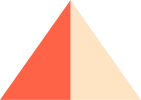

In [9]:
compose(context(),
        (context(units=UnitBox(0, 0, 1000, 1000)),
         polygon([(0, 1000), (500, 1000), (500, 0)]),
         fill("tomato")),
        (context(),
         polygon([(1, 1), (0.5, 1), (0.5, 0)]),
         fill("bisque")))

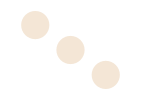

In [11]:
composition = compose(context(),
        Gadfly.circle([0.25, 0.5, 0.75], [0.25, 0.5, 0.75], [0.1]),
        fill(LCHab(92, 10, 77)))

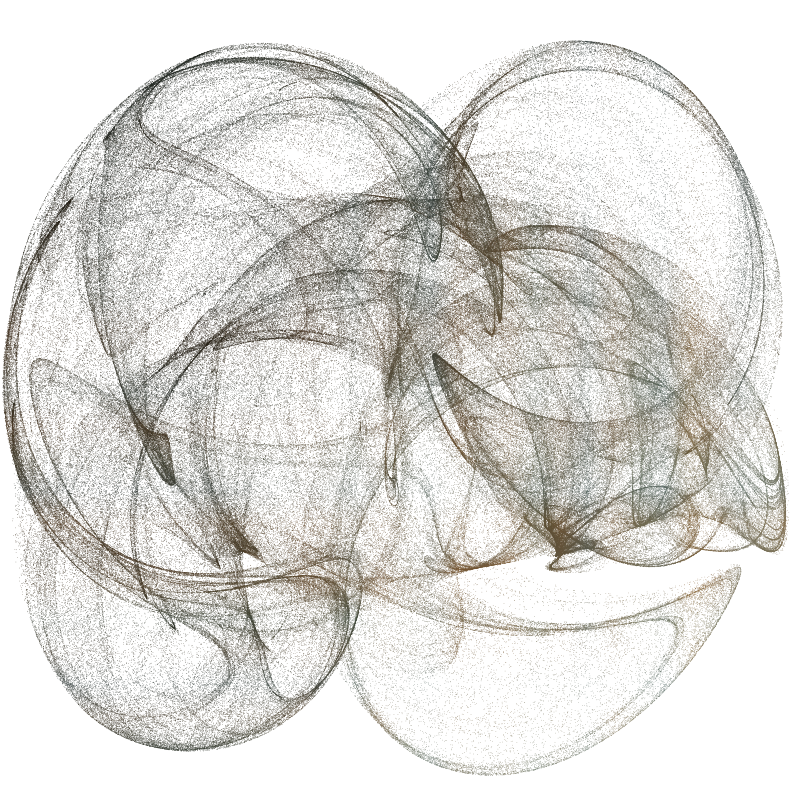

In [18]:
using Luxor, Colors, ColorSchemes
function strange(dotsize, w=800.0)
    xmin = -2.0; xmax = 2.0; ymin= -2.0; ymax = 2.0
    cs = ColorSchemes.botticelli
    Drawing(w, w, "strange-vector.png")
    origin()
    background("white")
    xinc = w/(xmax - xmin)
    yinc = w/(ymax - ymin)
    # control parameters
    a = 2.24; b = 0.43; c = -0.65; d = -2.43; e1 = 1.0
    x = y = z = 0.0
    wover2 = w/2
    for j in 1:w
        for i in 1:w
            xx = sin(a * y) - z  *  cos(b * x)
            yy = z * sin(c * x) - cos(d * y)
            zz = e1 * sin(x)
            x = xx; y = yy; z = zz
            if xx < xmax && xx > xmin && yy < ymax && yy > ymin
                xpos = rescale(xx, xmin, xmax, -wover2, wover2) # scale to range
                ypos = rescale(yy, ymin, ymax, -wover2, wover2) # scale to range
                col1 = get(cs, rescale(xx, -1, 1, 0.0, .5))
                col2 = get(cs, rescale(yy, -1, 1, 0.0, .4))
                col3 = get(cs, rescale(zz, -1, 1, 0.0, .2))
                sethue(mean([col1, col2, col3]))
                Luxor.circle(Point(xpos, ypos), dotsize, :fill)
            end
        end
    end
    finish()
    preview()
end

strange(.3, 800)

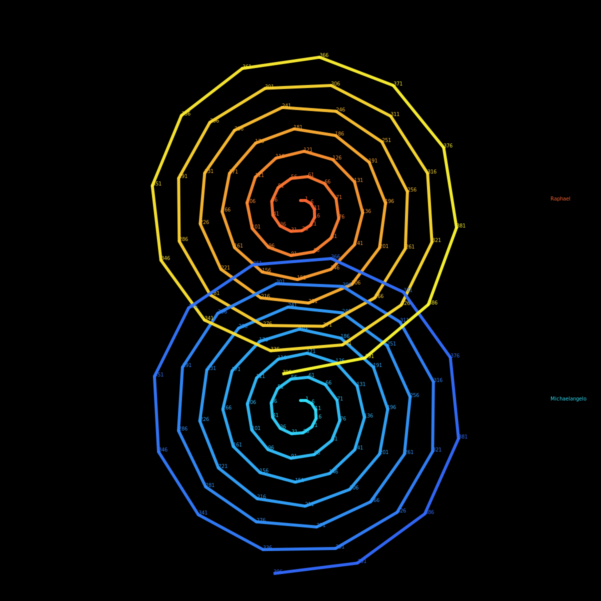

In [19]:
using Luxor

Drawing(1200, 1200, "/tmp/turtles.png")
origin()
background("black")

# let's have two turtles
raphael = Turtle(0, 0, true, 0, (1.0, 0.25, 0.25)) ; michaelangelo = Turtle(0, 0, true, 0, (1.0, 0.25, 0.25))

setopacity(0.95)
setline(6)

Pencolor(raphael, 1.0, 0.4, 0.2);       Pencolor(michaelangelo, 0.2, 0.9, 1.0)
Reposition(raphael, 500, -200);         Reposition(michaelangelo, 500, 200)
Message(raphael, "Raphael");            Message(michaelangelo, "Michaelangelo")
Reposition(raphael, 0, -200);           Reposition(michaelangelo, 0, 200)

pace = 10
for i in 1:5:400
    for turtle in [raphael, michaelangelo]
        Circle(turtle, 3)
        HueShift(turtle, rand())
        Forward(turtle, pace)
        Turn(turtle, 30 - rand())
        Message(turtle, string(i))
        pace += 1
    end
end

finish()
preview()

In [3]:
tiles = Tiler(400, 300, 4, 6, margin=5)
for (pos, n) in tiles
    randomhue()
    star(pos, tiles.tilewidth/3, rand(3:8), 0.5, 0, :fill)
end